# 14 - SVM para clasificación

![](images/portada_nb_FAV.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [1]:
from imports import *

## Support Vector Machines


EL SVM es un tipo de técnica ML que se puede utilizar tanto para clasificación como para regresión. Hay dos tipos principales para soportar problemas lineales y no lineales. Linear SVM no tiene kernel y encuentra una solución lineal al problema con un margen mínimo. El SVM con Kernel se utiliza cuando la solución no se puede separar linealmente.


## Teoría básica


Un hiperplano se deriva del modelo que maximiza el margen de clasificación. Si N características están presentes, el hiperplano será un subespacio dimensional N-1. Los nodos de frontera en el espacio de características se denominan vectores de soporte. Según su posición relativa, se deriva el margen máximo y se dibuja un hiperplano óptimo en el punto medio.

![](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

Es un problema de optimizacion,

![](https://i.ibb.co/TgrvCft/optimizasyon.jpg)

La optimización anterior funciona bien para soluciones separables completamente lineales. Para manejar valores atípicos, necesitamos un término flexible como se muestra a continuación. El segundo término usa la pérdida de bisagra para obtener una variable de holgura.

![](https://i.ibb.co/ZKmqy58/hinge.jpg)

C es el parámetro de regularidad que equilibra la penalización perdida y el ancho del margen. 

La lógica básica es que para minimizar la función de costo, w se ve obligado a ajustar con el máximo margen entre clases. El valor de C decidirá el nivel de regularidad aplicado a los conjuntos de datos. Decide el margen de nivel (suave / duro) que se aplicará a los conjuntos de datos. En resumen, C es el nivel de ignorancia hacia los valores atípicos.

Cuando el conjunto de datos no se puede separar linealmente, se utiliza una función de kernel para derivar un nuevo subplano para todos los datos de entrenamiento. La distribución de las etiquetas en el nuevo subplano será tal que los datos de entrenamiento sean linealmente separables. A continuación, una curva lineal clasificará las etiquetas en el plano inferior. Cuando los resultados de la clasificación se reflejan en el espacio de características, obtenemos una solución no lineal.

![](https://i.ibb.co/n3NbrxR/Ek-A-klama-2020-08-29-113927.jpg)

El único cambio en la ecuación aquí es describir una nueva función del núcleo. La nueva ecuación se verá así:

![](https://i.ibb.co/X28y1vG/Ek-A-klama-2020-08-29-114044.jpg)

$X_i$ será reemplazado por $\phi(x_i)$, que transformará el conjunto de datos en el nuevo hiperplano.

## El truco del kernel

Nos permite aprender un clasificador en más dimensiones sin calcular nuevas variables. Lo que hace es calcular la distancia (calcula el producto escalar) de los datos para la representación extendida, sin en realidad hacer la extensión.

Algunos kernels famosos:

- Polinómico
- Radial basis function (RBF) --> Kernel Gaussiano.

Durante el entrenamiento, los SVM aprenden la importancia de los datos de entrenamiento para representar la frontera entre las clases. Típicamente solo un subconjunto de los puntos importan para definir la frontera: los que caen el borde entre las clases. A éstos los llamamos vectores de sorporte, y de ahí viene el nombre del algoritmo. 

La distancia entre los puntos en el kernel gaussiano es :

$$
k_{rbf}(x_1,x_2) = \exp(-\gamma ||x_1 - x_2||^2)
$$

Donde $||x_1 - x_2||$ es la distancia euclideana y $\gamma$ es un parámetro que controla la anchura del kernel.

### Ejemplo

In [2]:
X,y = mglearn.tools.make_handcrafted_dataset()

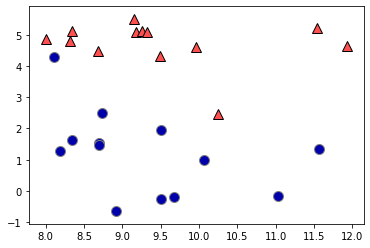

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [4]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X,y)

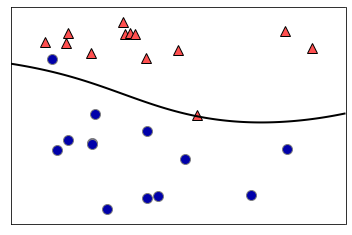

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)

In [6]:
svm.support_vectors_

array([[ 8.106,  4.287],
       [ 9.502,  1.938],
       [11.564,  1.339],
       [10.24 ,  2.455],
       [ 7.998,  4.853]])

Text(0, 0.5, 'Feature 1')

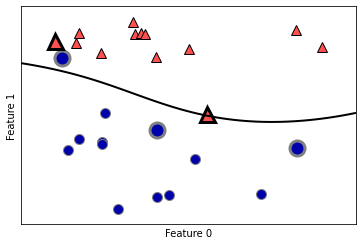

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, 
                         markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

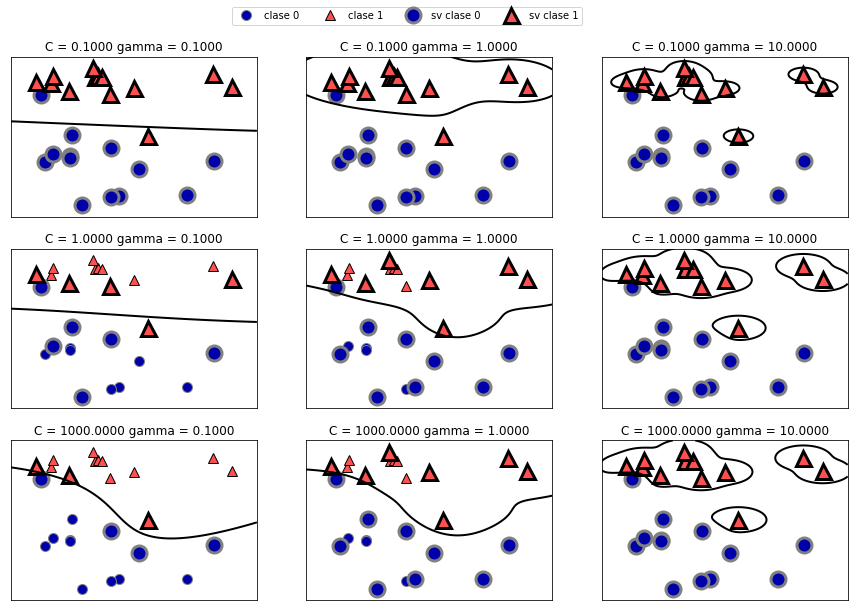

In [8]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(["clase 0", "clase 1", "sv clase 0", "sv clase 1"],
                ncol=4, loc=(0.9,1.2))

### Ventajas
- SVM usa el número de kernel para resolver soluciones complejas.
- SVM utiliza una función de optimización convexa cuyo mínimo global siempre es alcanzable.
- La pérdida de bisagra proporciona una mayor precisión.
- Los valores atípicos se pueden manejar bien utilizando la constante de margen suave C.


### Desventajas
- La pérdida de bisagra conduce a escasez.
- Los hiperparámetros y núcleos deben ajustarse cuidadosamente para una precisión adecuada.
- Mayor tiempo de entrenamiento para conjuntos de datos más grandes.


### Hiperparámetros
- **Constante de margen suave (C):**
    - Es un hiperparámetro que decide el nivel de penalización de los valores atípicos. Es el inverso del parámetro de regularización. Cuando C es grande, los valores atípicos recibirán una penalización alta y se creará un margen rígido. Cuando C es pequeño, los valores atípicos se ignoran y el margen es grande.
- **El grado del polinomio en el núcleo polinómico (d):**
    - Cuando d = 1, es equivalente a un núcleo lineal. Cuando D es más alto, el núcleo es lo suficientemente flexible como para distinguir patrones complejos proyectándolos en un nuevo hiperplano.

- **Parámetro de ancho (γ) en el kernel gaussiano:**
    - Gamma decide el ancho de la curva gaussiana. El ancho aumenta con el aumento de gamma.

# Clasificación y Búsqueda de parámetros

In [9]:
# Import the necessary packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC 

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Import and read dataset

data = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,...,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,...,1,0,4,1
1,55.0,0,7861,0,...,1,0,6,1
2,65.0,0,146,0,...,1,1,7,1
3,50.0,1,111,0,...,1,0,7,1
4,65.0,1,160,1,...,0,0,8,1
5,90.0,1,47,0,...,1,1,8,1
6,75.0,1,246,0,...,1,0,10,1
7,60.0,1,315,1,...,1,1,10,1
8,65.0,0,157,0,...,0,0,10,1
9,80.0,1,123,0,...,1,1,10,1


In [11]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,...,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,...,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,...,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,...,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,...,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,...,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,...,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,...,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,...,1.00,1.00,285.00,1.00


In [12]:
data.shape

(299, 13)

In [13]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:>

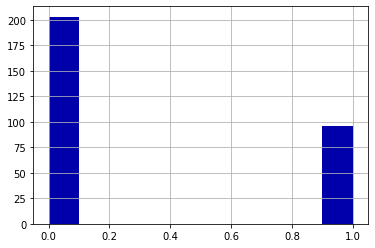

In [14]:
data["DEATH_EVENT"].hist()

In [15]:
inp_data = data.drop(data[['DEATH_EVENT']], axis=1)
out_data = data[['DEATH_EVENT']]

scaler = StandardScaler()
inp_data = scaler.fit_transform(inp_data)

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=42)

No se escala la variable target

In [16]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 12)
X_test Shape  :  (60, 12)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


In [17]:
# basic method
clf = SVC() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7500
SVC f1-score  : 0.6154
SVC precision : 0.4800
SVC recall    : 0.8571

               precision    recall  f1-score   support

           0       0.94      0.72      0.81        46
           1       0.48      0.86      0.62        14

    accuracy                           0.75        60
   macro avg       0.71      0.79      0.72        60
weighted avg       0.83      0.75      0.77        60



In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[33,  2],
       [13, 12]], dtype=int64)

In [19]:
# find best parameters with SVC | Step 1
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
gammas = list([0.1, 1, 10, 100])

clf = SVC()
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

**n_jobs = -1** es para paralelizar la búsqueda.

**verbose** es para ver lo que está haciendo la computadora

In [20]:
clf = SVC(C=10, gamma=0.1, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8000
SVC f1-score  : 0.7143
SVC precision : 0.6000
SVC recall    : 0.8824

               precision    recall  f1-score   support

           0       0.94      0.77      0.85        43
           1       0.60      0.88      0.71        17

    accuracy                           0.80        60
   macro avg       0.77      0.82      0.78        60
weighted avg       0.85      0.80      0.81        60



## Con SMOTE

In [21]:
!pip install imblearn

In [22]:
from imblearn.over_sampling import SMOTE

sms = SMOTE(random_state=12345)
X_res, y_res = sms.fit_resample(inp_data, out_data)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,
                                                    stratify=y_res, random_state=42)

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (324, 12)
X_test Shape  :  (82, 12)
y_train Shape :  (324, 1)
y_test Shape  :  (82, 1)


array([[<AxesSubplot:title={'center':'DEATH_EVENT'}>]], dtype=object)

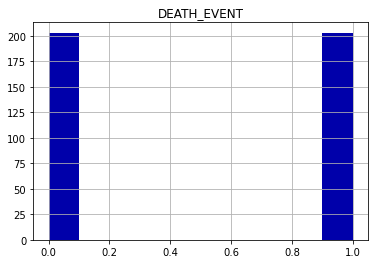

In [27]:
y_res.hist()

In [23]:
# find best parameters with SVC | Step 2
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.001, 0.01, 0.1, 1, 10, 100])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

clf = SVC()
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

In [24]:
clf = SVC(C=10, gamma=0.2, kernel='rbf') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.9390
SVC f1-score  : 0.9425
SVC precision : 1.0000
SVC recall    : 0.8913

               precision    recall  f1-score   support

           0       0.88      1.00      0.94        36
           1       1.00      0.89      0.94        46

    accuracy                           0.94        82
   macro avg       0.94      0.95      0.94        82
weighted avg       0.95      0.94      0.94        82



<AxesSubplot:>

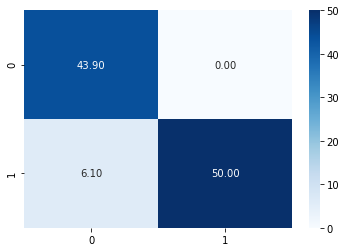

In [25]:
y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

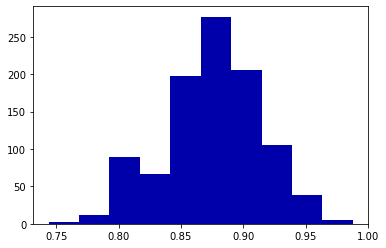

In [26]:
# sanity check
scores = [] 
for i in range(0,1000): 
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)
    clf = SVC(kernel='rbf', C=10, gamma=0.2) 
    clf.fit(X_train, y_train)
    scores.append(accuracy_score(clf.predict(X_test), y_test)) 

plt.hist(scores)
plt.show()

Es mejor presentar como accuracy el 87% del histograma anterior